In [1]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("dati_preprocessati.csv")

Per riorganizzare i dati in un primo momento vogliamo separare ogni giornata anomalous con il relativo df_target, composto da giornate normali.
Per fare questo aggiungo una colonna al dataframe, che indica il numero di righe normali consecutive che precedono un giorno anomalo.


In [3]:
cont = 0
finestra = []

for row in df.itertuples():
  
  if row[3] == 0:
    cont+=1
    finestra.append(0)
  else: 
    finestra.append(cont)
    cont = 0

df["Finestra"] = finestra
df.to_csv("finestra.csv")

Viene creata una lista di dataframe, dove ogni dataframe è composto da [n giornate normali; giornata anomala]
Il formato scelto per conservare i dati è *pickle*, che permette di serializzare e deserializzare in modo binario interi oggetti.
Questo permette di serializzare l'intera lista in un'unico file che sarà facilmente recuperabile tramite pickle.

In [4]:
df_list = list()
cont = 0

for row in df.itertuples():
  if (row[3] == 1) & (row[4] != 0):

    # giorni normali precedenti più il giorno anomalo
    df_target = df.iloc[row[0] - row[4] : row[0] + 23]
    df_list.append(df_target)

with open('dati_riorganizzati.pkl', 'wb') as output:
  pickle.dump(df_list, output, pickle.HIGHEST_PROTOCOL)

Esempio di recupero dei dati tramite pickle e formato del nuovo database.

22     0.231142
23     0.011124
24     0.010477
25     0.091583
26     0.412114
         ...   
224    0.978982
225    0.793742
226    0.568364
227    0.448341
228    0.287481
Name: Affluenza, Length: 207, dtype: float64
     Index  Affluenza  Anomalous  Finestra
229     11   0.174830          0         0
230     11   0.180543          0         0
231     11   0.178664          0         0
232     11   0.257729          0         0
233     11   0.531776          0         0
..     ...        ...        ...       ...
316     14   0.000000          1         0
317     14   0.227761          1         0
318     14   0.184875          1         0
319     14   0.181360          1         0
320     14   0.181357          1         0

[92 rows x 4 columns]


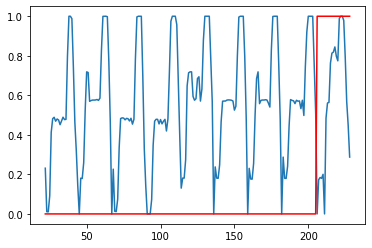

In [5]:
with open('dati_riorganizzati.pkl', 'rb') as input:
  df_list = pickle.load(input)
  print(df_list[0]["Affluenza"])
  print(df_list[1])

  plt.plot(df_list[0].index,df_list[0]["Affluenza"])
  plt.plot(df_list[0].index,df_list[0]["Anomalous"],color="r")